# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importar librerías
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# leer conjuntos de datos en los DataFrames
instacart_orders = pd.read_csv("/datasets/instacart_orders.csv", sep=";")
products = pd.read_csv("/datasets/products.csv", sep=";")
aisles = pd.read_csv("/datasets/aisles.csv", sep=";")
departments = pd.read_csv("/datasets/departments.csv", sep=";")
order_products = pd.read_csv("/datasets/order_products.csv", sep=";")

In [3]:
# mostrar información del DataFrame
instacart_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
# mostrar información del DataFrame
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# mostrar información del DataFrame
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
# mostrar información del DataFrame
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
# mostrar información del DataFrame
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

A través de revisar nuestros DF con el método info() podemos: 
- Revisar el tipo de datos que contiene cada columna: Con ello podemos analizar si se tenga que cambiar el tipo de dato para adecuarlo a nuestro análisis. 
- El tamaño del dataframe: Para darnos una idea de la cantidad de datos que manejaremos del DF.
- Identificar valores ausentes: Podemos identificar qué columnas tienen variables ausente o revisar si necesita alguna modificación de acuerdo a lo que tiene que expresar la columna. 

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

Se procede primero con limpiar los datos ausentes y duplicados. A partir de llamar a info podemos ver el tamaño de nuestro dataframe, así como también el tamaño de datos de cada columna. Por lo que se analizará cada tabla llamado a los métodos correspondientes para duplicados y valores ausentes. 

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart_orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
instacart_orders["order_id"].duplicated().sum()

15

In [9]:
instacart_orders[instacart_orders.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Lo que tienen en común son los mismos valores en "order_dow" y el mismo en "order_hour_of_day"

In [10]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.

wednesday_orders_at_two = instacart_orders[(instacart_orders["order_dow"] == 3) & (instacart_orders["order_hour_of_day"] == 2)]
wednesday_orders_at_two

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


¿Qué sugiere este resultado?

Que las columnas que coinciden con los valores filtrados order_dow y order_hour_of_day no necesarimente tienen un dato duplicado. 

In [11]:
# Elimina los pedidos duplicados
instacart_orders = instacart_orders.drop_duplicates().reset_index(drop=True)

In [12]:
# Vuelve a verificar si hay filas duplicadas
instacart_orders.duplicated().sum()


0

In [13]:
# Vuelve a verificar si hay IDs duplicados de pedidos
instacart_orders["order_id"].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos

Se revisó si hay pedidos dupicados a partir de filtrar la columna "order_id". Al imprimir sus resultados, notamos que coinciden con los mismos valores para dos columnas: "order_dow", con el valor 3, y "order_hour_of_day", con el valor 2. Sin embargo, si filtramos el dataframe "instacart_orders" con estos valores, nos arroja que tenemos un total de 121 filas que cumplen con estas condiciones. 

Por lo tanto, si notamos que hay valores que coinciden en varias columnas cuando revisamos los duplicados, debemos filtrar el dataframe con estos valores para dar un vistazo al contenido de la tabla y analizar si estos valores duplicados pueden afectar al análisis de datos. 

Al ser solo 15 duplicados en una tabla de 478967 entradas/filas, se decidió borrarlos del dataframe ya que no afectará en gran medida los resultados de nuestro análisis. 

### `products` data frame

In [14]:
# Verifica si hay filas totalmente duplicadas
products.duplicated().sum()

0

In [15]:
# Verifica si hay IDs duplicadas de productos
products["product_id"].duplicated().sum()

0

In [16]:
# Revisa si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products["product_name"] = products["product_name"].str.upper()
products["product_name"].duplicated().sum()


1361

In [17]:
# Revisa si hay nombres duplicados de productos no faltantes
products[(~products['product_name'].isna()) & products['product_name'].duplicated()]


,product_id,product_name,aisle_id,department_id
2058,2059,BIOTIN 1000 MCG,47,11
5455,5456,GREEN TEA WITH GINSENG AND HONEY,96,20
5558,5559,CREAM OF MUSHROOM SOUP,69,15
7558,7559,CINNAMON ROLLS WITH ICING,105,13
9037,9038,AMERICAN CHEESE SLICES,21,16
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Es importante que la capitalización de los valores tipo string/object sea uniforme, ya que al llamar a duplicated distingue la misma palabra con distinta capitalización como un valor distinto. 

### `departments` data frame

In [18]:
# Revisa si hay filas totalmente duplicadas
departments.duplicated().sum()

0

In [19]:
# Revisa si hay IDs duplicadas de productos
departments["department_id"].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Departments es un dataframe pequeño, por lo que se puede hacer una revisión breve de los datos para corroborar que efectivamente no contiene duplicados. 

### `aisles` data frame

In [20]:
# Revisa si hay filas totalmente duplicadas
aisles.duplicated().sum()

0

In [21]:
# Revisa si hay IDs duplicadas de productos
aisles["aisle_id"].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Aisles es un dataframe pequeño, por lo que se puede hacer una revisión breve de los datos para corroborar que efectivamente no contiene duplicados. 

### `order_products` data frame

In [22]:
# Revisa si hay filas totalmente duplicadas
order_products.duplicated().sum()


0

In [23]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
order_products[["order_id","product_id"]].duplicated().sum()

0

In [24]:
# Ver los productos que se han reordenado en el mismo pedido
reordered_products = order_products[order_products["reordered"] == 1]
reordered_products_order= reordered_products.groupby("order_id")["product_id"].unique().reset_index()
reordered_products_order

,order_id,product_id
0,4,"[27761, 22598, 39758, 32645, 10054, 34862, 412..."
1,9,"[29193, 14992, 3990, 2014, 44533, 27366, 432, ..."
2,11,"[27085, 5994, 1313, 31506, 30162]"
3,19,"[24838, 42265, 41540]"
4,31,"[31717, 4920, 29926, 47900, 48946, 25647, 2190..."
...,...,...
395814,3421013,"[7326, 25743, 3689, 36615, 28449, 28073, 30235..."
395815,3421018,"[44910, 48622, 9890, 24891, 21872, 32732, 2965..."
395816,3421034,"[27503, 7948, 14764, 46993, 28476, 36316, 2148..."
395817,3421053,"[26209, 39993, 39024, 35147, 36522, 12206, 304..."


In [25]:
# Ver los productos que han sido comprados más de una vez
product_counts = order_products.groupby("product_id")["order_id"].count()
products_more_than_once = product_counts[product_counts > 1]
products_more_than_once

product_id
1        280
2         11
3         42
4         49
7          2
        ... 
49690      5
49691     72
49692     12
49693     25
49694      9
Name: order_id, Length: 40526, dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se debe de entender los datos para evitar interpretar que los datos sean duplicados. Por ejemplo, el "product_id" y el "order_id" tiene datos repetidos, pero eso solo significa el número de veces que aparecen en el dataframe, no necesariamente son datos duplicados. Igualmente podemos jugar con los datos para tener una perspectiva de la información, tal como revisar los productos que se adquirieron un pedido y los productos reordenados por pedido. 

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [26]:
# Encuentra los valores ausentes en la columna 'product_name'
nan_product_name = products["product_name"].isna().sum()
nan_product_name

1258

Describe brevemente cuáles son tus hallazgos.

La columna product_name del data frame products contiene 1258 valores nulos. Se tiene que revisar por qué tiene valores ausentes. 

In [27]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
products_id100 = products[products["aisle_id"] == 100]
products_id100
                          


,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.

Al revisar los datos ausentes de product name y al filtrar por el aisle_id con valor a 100, nos arroja que ahí están los valores ausentes. Por lo que el aisle_id con valor a 100 nos indidca que no tiene una asignación de información que nos ayude a identiticar el producto. 

In [28]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
products_id21 = products[products["department_id"] == 21]
products_id21


,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.

Al revisar los datos ausentes de product name y al filtrar por el department_id con valor a 21, nos arroja que ahí están los valores ausentes. Por lo que el department_id con valor a 21 nos indidca que no tiene una asignación de información que nos ayude a identiticar el producto. 

In [29]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
aisles_100= aisles[aisles["aisle_id"] == 100]
aisles_100

,aisle_id,aisle
99,100,missing


In [30]:
departments_21 = departments[departments["department_id"] == 21]
departments_21

,department_id,department
20,21,missing


Describe brevemente cuáles son tus hallazgos.

Podemos filtrar nuevamente las columnas para verificar el contenido de aisle y department. Ambos nos indican que tienen como valor missing. Esto nos ayuda a determinar a que no es un error en los datos y que el supermercado lo ha definido de esta manera. 

In [31]:
# Completa los nombres de productos ausentes con 'Unknown'
products["product_name"] = products["product_name"].fillna("Unknown")


Describe brevemente tus hallazgos y lo que hiciste con ellos.

En caso revisamos que hay productos que no tienen nombre debido a que el id del pasillo y del departamento están como ausentes por el mismo dataframe. Al filtrar los datos para revisar datos ausentes podemos completar el nombre con base en lo que revisamos en el filtrado de datos ausentes. Al ser una cantidad de 1258 entradas, podemos completar el product name como Unknown debido a que no tenemos la información necesaria para suponer de qué se trata. Siempre se debe de procurar llenar la información ausente con algún valor que sea significativo y no borralo del dataframe. 


### `orders` data frame

In [32]:
# Encuentra los valores ausentes
instacart_orders["days_since_prior_order"].isna().sum()

28817

In [33]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
instacart_orders[instacart_orders["days_since_prior_order"] != 1].isna().sum()  


order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se revisan los datos ausentes de la última vez que un cliente realizó un pedido. No obstante, se puede concluir que hay pedidos en donde el valor nulo representa que es la primera vez que un cliente realiza un pedido. 
Al filtrar los datos en donde el primer valor no sea el primero, nos permite permite verificar si existen valores ausentes en cualquier columna del dataFrame. En este caso solo se encuentra en la columna "days_since_prior_oder".

### `order_products` data frame

In [34]:
# Encuentra los valores ausentes
order_products["add_to_cart_order"].isna().sum()

836

In [35]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(order_products["add_to_cart_order"].min())
print(order_products["add_to_cart_order"].max())

1.0
64.0


Describe brevemente cuáles son tus hallazgos.

Corroboramos que la columna "add_to_cart_order" del dataframe order_products no tiene valores ausentes. Gracias a los datos de esta columna, podemos valorar el rango de cantidad de productos se llevan los clientes en cada compra. 

In [36]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
id_null_value = order_products[order_products["add_to_cart_order"].isna()]["order_id"].unique()
print(id_null_value)


[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [37]:
#¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
more_than_64_orders = order_products[order_products["order_id"].isin(id_null_value)]  
more_than_64_orders["order_id"].value_counts().min()


65

Describe brevemente cuáles son tus hallazgos.

Solo algunos de los pedidos con valores tienen más de 64 pedidos, por lo que es necesario corroborar la relación de datos ausentes de una columna tomando en cuenta los valores de otra columna del dataframe. 

In [38]:
# Remplaza los valores ausentes en la columna 'add_to_cart con 999 y convierte la columna al tipo entero.
order_products["add_to_cart_order"] = order_products["add_to_cart_order"].fillna(999).astype(int)
                                

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Al rellenar con 999 se brinda un valor aleatorio a una columna cuyos valores no podemos asumir con cálculos o al observar los datos: no sabemos en qué orden se agregaron los artículos con valores nulos en "add_to_cart_order". 

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

Es necesario seguir cada paso del análisis de datos, desde llamar a nfo para ver qupé tipos de datos contiene el df, borrar los duplicados y llenar los datos ausentes. Sin embargo, es necesario revisar la razón detrás de que alguna columna nos arroje algún ausente o duplicado, ya que puede que no represente necesariamente algún error en los datos. Es necesario interpretar la información y tomar en cuenta la relación que existe entre varibles. 

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [54]:
print(instacart_orders["order_hour_of_day"].min())
print(instacart_orders["order_hour_of_day"].max())

print(instacart_orders["order_hour_of_day"].unique())

0
23
[13 12 19 20 11  8 18 15 16  9 22 10  0 14 17  1  7  6  2 21  3 23  5  4]


In [57]:
print(instacart_orders["order_dow"].min())
print(instacart_orders["order_dow"].max())

print(instacart_orders["order_dow"].unique())

0
6
[6 5 0 4 3 1 2]


Escribe aquí tus conclusiones

En esta verificación se corroborar los límites de los ejes que tendremos en las siguientes tablas, así como también de que los valores coincidan con lo que representan (días de la semana y timepo del día)

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

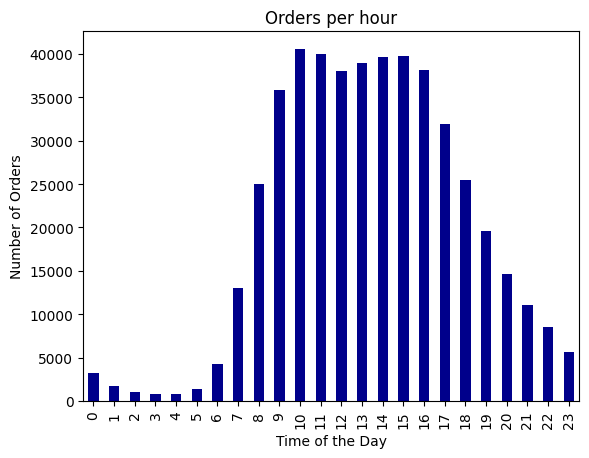

In [41]:
#Gráfico número de personas que hacen pedidos dependiendo de la hora del día
df_hours = instacart_orders["order_hour_of_day"].value_counts().sort_index()
df_hours.plot(xlabel="Time of the Day", ylabel="Number of Orders", kind="bar", title="Orders per hour", color="darkblue")
plt.show()

Escribe aquí tus conclusiones

Gran parte de los pedidos son colocados entre las 9 a 16 horas. Por lo tanto, hay una gran cantidad de clientes que realizan sus compras en ese horario. Este disminuye en la noche desde las 17 hasta las 23 horas, siendo las horas de la madrugada las que  reflejan menos pedidos. Podemos concluir que el horario de 9 a 16 horas puede ser un enfoque para recalcar al supermercado la eficiencia en el proceso de compras, estrategias de atracción de clientes, presentación de productos, etc. 

### [A3] ¿Qué día de la semana compran víveres las personas?

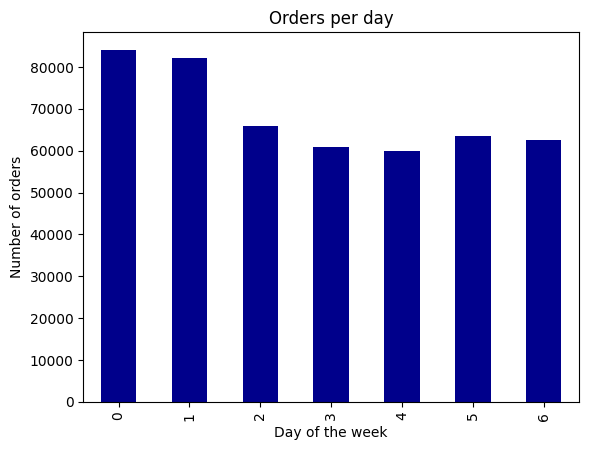

In [42]:
#Gráfico día de la semana la gente hace sus compras
df_day = instacart_orders["order_dow"].value_counts().sort_index()
df_day.plot(xlabel="Day of the week", ylabel="Number of orders",title="Orders per day", kind="bar", color="darkblue")
plt.show()

Escribe aquí tus conclusiones

Se puede observar que el número de compras esta distribuido en cada uno de los días de la semana. Ninguno de los días presenta algún pico o valle significativo. Solo caben destacar los domingos y lunes que presentan un mayor número de compras, con un total de 80,000 pedidos para cada día. Por lo tanto, el supermercado debe de enfocar la creación de estrategias para distintos días de la semana. 

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

<AxesSubplot:title={'center':'Time betweeen orders'}, xlabel='Amount of days', ylabel='Order numbers'>

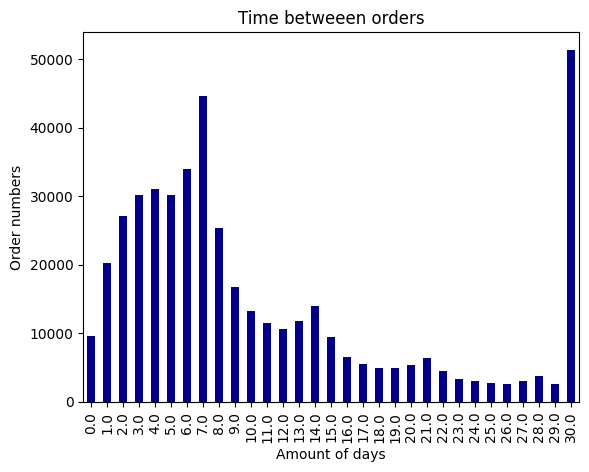

In [43]:
#Gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido,
df_prior_order = instacart_orders["days_since_prior_order"].value_counts().sort_index()
df_prior_order.plot(xlabel="Amount of days", ylabel= "Order numbers", y="days_since_prior_order", kind="bar", title= "Time betweeen orders", color="darkblue")

Escribe aquí tus conclusiones
Se observan los días transcurridos de espera para que el cliente coloque un nuevo pedido. Los datos reflejan que la mayoría de los clientes realizan su próxima compra después de dos tiempos: 7 y 30 días. Sin embargo, una proporción importante del tiempo transcurrido toma lugar entre 1 a 8 días transcurridos. Por lo tanto, gran parte de los pedidos se realizan a pocos días de su última compra. Con esta información podemos interpretar los comportamientos de los clientes y buscar las razones detrás de dicho patrón. El resto de los días transcurrido del 9 al 29, no alcanzan la cantidad de pedidos colocados en los primeros días transcurridos. Solo hay un ligero aumento con casi 15,000 pedidos el día 14. 
    
Se podría interpretar que las personas van de compras a los pocos días de su última visita, ya sea por haber olvidado un artículo o comprar una oferta inesperada y/o van de compras cuando se deposita sus nóminas a fin de mes. 


# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

<AxesSubplot:title={'center':'Wednesday vs Saturday amount of orders'}, xlabel='Time of the day', ylabel='Amount of orders'>

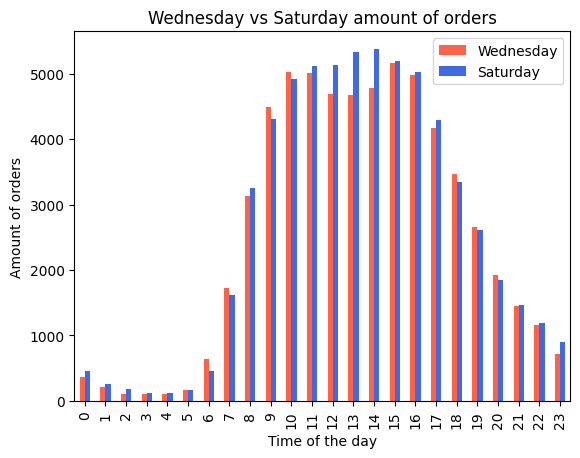

In [44]:
wednesday = instacart_orders[instacart_orders["order_dow"] == 3]["order_hour_of_day"].value_counts().sort_index()
saturday = instacart_orders[instacart_orders["order_dow"] == 6]["order_hour_of_day"].value_counts().sort_index()
df_concat = pd.concat([wednesday, saturday], axis=1)
df_concat.columns = ["Wednesday", "Saturday"]
df_concat.plot(kind="bar", xlabel="Time of the day", ylabel="Amount of orders", title="Wednesday vs Saturday amount of orders", color=["tomato", "royalblue"])

Escribe aquí tus conclusiones

En la comprativa del total de compras realizadas durante los miércoles y sábado, nos muestran que tienen un comportamiento muy similar dependiendo de la hora de compra. Aunque el sábado tiene una diferencia pequeña mayor al miércoles. Con esta información podemos corroborar la información arrojada en la gráfica de "Orders per day" en donde la cantidad de pedidos es casi la misma en cualquier día de la semana. De igual manera, corroboramos que esta gráfica se comparta igual que la gráfica "Orders per hour", siendo el horario de 9 a 16 con mayor cantidad de pedidos. 

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

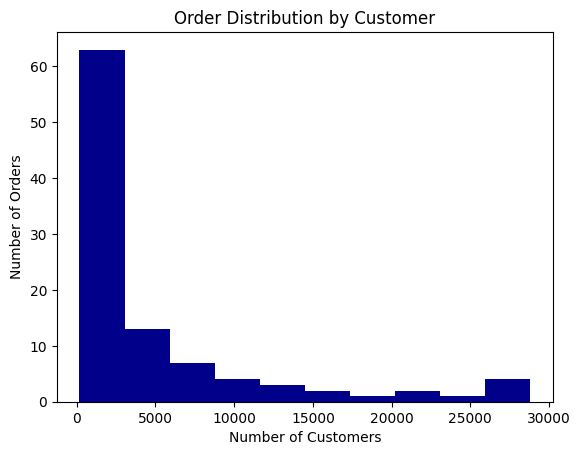

In [45]:
order_distribution = instacart_orders["order_number"].value_counts().sort_index()
order_distribution.plot(kind="hist", title="Order Distribution by Customer", color="darkblue")
plt.xlabel("Number of Customers")
plt.ylabel("Number of Orders")
plt.show()

Escribe aquí tus conclusiones

Esta gráfico muestra que la mayoría de los clientes, menos de 5000 usuarios, realizan hasta 60 compras el cual es la cantidad más representativa para la gráfica. Sin embargo, para el resto de los contenedores se puede revisar que los usuarios realizan pedidos constantes entre 1 a 5 pedidos. Por lo que nos demuestra que los usuarios realizan compras frecuentes. 

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [46]:
product_counts = order_products.groupby("product_id")["order_id"].count()
product_counts = product_counts.reset_index()
product_counts = product_counts.sort_values(by="order_id", ascending=False)
top_20_products = product_counts.head(20)
top_20_products_info = pd.merge(top_20_products, products[["product_id", "product_name"]], on="product_id", how="left")
top_20_products_info

,product_id,order_id,product_name
0,24852,66050,BANANA
1,13176,53297,BAG OF ORGANIC BANANAS
2,21137,37039,ORGANIC STRAWBERRIES
3,21903,33971,ORGANIC BABY SPINACH
4,47209,29773,ORGANIC HASS AVOCADO
5,47766,24689,ORGANIC AVOCADO
6,47626,21495,LARGE LEMON
7,16797,20018,STRAWBERRIES
8,26209,19690,LIMES
9,27845,19600,ORGANIC WHOLE MILK


Escribe aquí tus conclusiones

Al revisar la tabla de los artículos más comprados, podemos notar que se tratan de artículos relacionados con la alimentación. Hay una variedad de frutas y verduras. Esto puede deberse a que la sección de frutas y verduras es la que se ubica en la entrada de los supermercados. Igualmente porque estos ítems son los que más se requieren de manera básica. Gracias a este breve análisis podemos identificar los ítems que el supermercado debe de considerar en stock y con buena calidad. 

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

El promedio de artículos por pedido es: 10


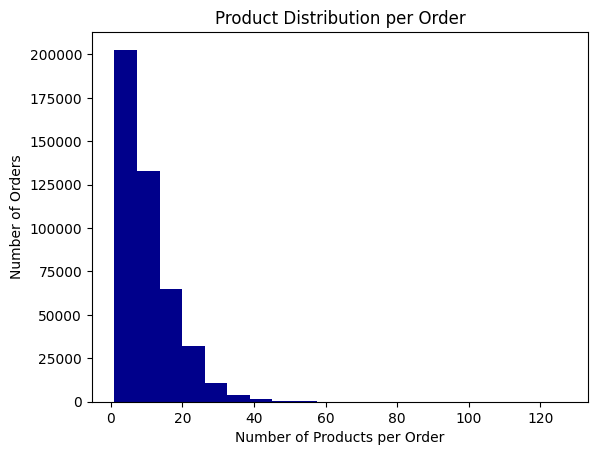

In [47]:
items_per_order = order_products.groupby("order_id")["product_id"].count()
avg_items_per_order = items_per_order.mean()
print("El promedio de artículos por pedido es:", int(avg_items_per_order))
plt.hist(items_per_order, bins=20, color="darkblue")
plt.xlabel("Number of Products per Order")
plt.ylabel("Number of Orders")
plt.title("Product Distribution per Order")
plt.show()

Escribe aquí tus conclusiones

En esta gráfica hay un sesgo hacia la izquierda, la cual refleja que para la mayoría de los pedidos, entre 150,000 y 200,000 pedidos, contienen en promedio 10 artículos. Igualmente notamos que la distribución refleja que hata 25,000 pedidos se llevan entre 15 a 25 artículos. Hay solo pocos pedidos en donde se pueden solicitar desde 60 hasta 120 artículos. Se podría estudiar estos pedidos para revisar de qué artículos se tratan para que pasen a esas grandes cantidades. 

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [48]:
reordered_products = order_products[order_products["reordered"] == 1]
reordered_counting = reordered_products["product_id"].value_counts()
reordered_counting_df = reordered_counting.reset_index(name="count")
reordered_counting_df.columns = ["product_id", "count"]  
top_20_reordered_products = reordered_counting_df.sort_values(by="count", ascending=False).head(20)
top_20_reordered_products_info = pd.merge(top_20_reordered_products, products[["product_id", "product_name"]], on="product_id", how="left")
top_20_reordered_products_info

,product_id,count,product_name
0,24852,55763,BANANA
1,13176,44450,BAG OF ORGANIC BANANAS
2,21137,28639,ORGANIC STRAWBERRIES
3,21903,26233,ORGANIC BABY SPINACH
4,47209,23629,ORGANIC HASS AVOCADO
5,47766,18743,ORGANIC AVOCADO
6,27845,16251,ORGANIC WHOLE MILK
7,47626,15044,LARGE LEMON
8,27966,14748,ORGANIC RASPBERRIES
9,16797,13945,STRAWBERRIES


Escribe aquí tus conclusiones

En esta tabla se demuetra que los productos más reordenados con frutas y verduras. Los resultados de esta tabla coinciden con varios de la tabla de los "20 productos más comprados". Por lo que los clientes, por obvias razones, vuelven a comprar artículos relacionados con la alimentación. Igualmente podemos concluir que el supermercado puede enfocarse en mantener un stock de buena calidad para estos artículos para asegurar las compras y satisfacción de sus clientes. También puede enfocar sus estrategias de ofertas en los artículos del departamento de frutas y verduras. 

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [49]:
df_merged = pd.merge(order_products, products[["product_id", "product_name"]], on="product_id", how="left")
total_products = df_merged.groupby(["product_id", "product_name"])["order_id"].nunique()
reordered_products = df_merged[df_merged["reordered"] == 1]
total_reorder = reordered_products.groupby(["product_id", "product_name"])["order_id"].nunique()
repeat_rate = (total_reorder / total_products) * 100
repeat_rate

product_id  product_name                                                     
1           CHOCOLATE SANDWICH COOKIES                                           56.428571
2           ALL-SEASONS SALT                                                           NaN
3           ROBUST GOLDEN UNSWEETENED OOLONG TEA                                 73.809524
4           SMART ONES CLASSIC FAVORITES MINI RIGATONI WITH VODKA CREAM SAUCE    51.020408
7           PURE COCONUT WATER WITH ORANGE                                       50.000000
                                                                                   ...    
49690       HIGH PERFORMANCE ENERGY DRINK                                        80.000000
49691       ORIGINAL PANCAKE & WAFFLE MIX                                        43.055556
49692       ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR                      41.666667
49693       SPRING WATER BODY WASH                                               44.000000
49694       

Escribe aquí tus conclusiones
En esta tabla nos ayuda a revisar la proporción de veces que se solicitó un artículos. Puedo servir como punto de referencia para los proveedores del supermercado, creación de estrategias, artículos que pueden ser potenciales para que vuelvan a ser solicitados, así como también revisar las preferencias de los clientes. 

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [50]:
merged_data = pd.merge(order_products, instacart_orders[["order_id", "user_id"]], on="order_id", how="left")

ordered_again = merged_data.groupby("user_id").agg(total_products=("product_id", "count"),repeated_products=("reordered", "sum"))
ordered_again["ordered_again_distribution"] = ordered_again["repeated_products"] / ordered_again["total_products"]
ordered_again[["total_products", "repeated_products", "ordered_again_distribution"]]

,total_products,repeated_products,ordered_again_distribution
user_id,,,
2,26,1,0.038462
4,2,0,0.000000
5,12,8,0.666667
6,4,0,0.000000
7,14,13,0.928571
...,...,...,...
206203,27,6,0.222222
206206,21,15,0.714286
206207,46,41,0.891304


Escribe aquí tus conclusiones

Este análisis sirve para ver el comportamiento de cada usuario. Con esta información, el supermercado puede tener una vista general del comportameinto de los usuarios a partir de la proporcion de pedidos que se volvieron a colocar. Con esta información se puede decidir estrategias de retención de clientes u ofertas personalizadas. 

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [51]:
first_items = order_products[order_products["add_to_cart_order"] == 1]
first_item_counts = first_items.groupby("product_id")["add_to_cart_order"].count()
top_20_first_items = first_item_counts.sort_values(ascending=False).head(20)
top_20_first_items = top_20_first_items.reset_index(name="count") 
top_20_first_items = pd.merge(top_20_first_items, products[["product_id", "product_name"]], on="product_id", how="left")
top_20_first_items[["product_id", "product_name", "count"]]

,product_id,product_name,count
0,24852,BANANA,15562
1,13176,BAG OF ORGANIC BANANAS,11026
2,27845,ORGANIC WHOLE MILK,4363
3,21137,ORGANIC STRAWBERRIES,3946
4,47209,ORGANIC HASS AVOCADO,3390
5,21903,ORGANIC BABY SPINACH,3336
6,47766,ORGANIC AVOCADO,3044
7,19660,SPRING WATER,2336
8,16797,STRAWBERRIES,2308
9,27966,ORGANIC RASPBERRIES,2024


Escribe aquí tus conclusiones
 
En esta última tabla se corrobora que los clientes toman la decisión de ir al supermercado a partir de la necesidad de reabastecer sus víveres. Igualmente varios de estos ítems coinciden con las tablas de los artículos más populares y que se vuelven a comprar con más frecuencia. 

### Conclusion general del proyecto:

Cada vez que empezamos con un proyecto es importante inciar con la información de cada dataframe para tener un panorama general de la información. Después procedemos con la limpieza de datos, al identificar los duplicados y datos ausentes que, si no tratan de manera adecuada, puede distorsionar los resultados. Es importtante que comprendamos la relación entre cada columna y los datos que desea expresar, ya que a veces nos arroja resultados que no necesariamente significa que estén erróneos o que no tengan un porqué detrás de su estructura. 

Varios datos parecían ser duplicados de acuerdo a su coincidencia de valor en algunas columnas, pero nunca debemos dar por sentado que todos los datos con esos valores son duplicados o ausentes. Por lo tanto, es importante comprender los datos y siempre debemos de verificar los datos a partir de la creación de filtros. 

En la parte de visualización de datos no solo nos ayuda a presentar en una gráfica los resultados, sino que también es una corroboración de que los datos fueron limpiados de manera correcta. En este paso, al filtrar la información, nuestros datos reflejan los patrones que sigue el dataframe. La visualización de datos nos permite comparar, priorizar y calcular las preguntas que deseamos resolver. A partir de un vistazo a las tablas y gráficos podemos inferir y analizar la información para el cliente, así como también sugerir propuestas que el supermercado puede diseñar para sus clientes y artículos. 
